### Como parte de esta actividad, se toma una base de datos y se responderán preguntas previamente formuladas con el fin de describir de alguna forma los datos. En este caso se ha tomado la base de datos sobre el Covid-19.

In [214]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

In [133]:
TABLA=pd.read_csv('covid19alldata.csv',encoding='latin')
COVID19data=pd.DataFrame(TABLA)
COVID19data

,FECHAACTUALIZACION,ORIGEN,SECTOR,ENTIDADUM,SEXO,ENTIDAD_NAC,FECHAINGRESO,FECHASINTOMAS,FECHADEF,INTUBADO,...,OTRACOM,CARDIOVASCULAR,OBESIDAD,RENALCRONICA,TABAQUISMO,OTROCASO,RESULTADO,MIGRANTE,PAISORIGEN,UCI
0,10/09/2020,2,4,25,2,25,20/04/2020,17/04/2020,9999-99-99,97,...,2,2,2,2,2,1,1,99,99,97
1,10/09/2020,2,3,8,1,8,29/05/2020,26/05/2020,9999-99-99,97,...,2,2,2,2,2,1,1,99,99,97
2,10/09/2020,2,4,9,1,9,08/04/2020,07/04/2020,9999-99-99,97,...,2,2,2,2,2,1,1,99,99,97
3,10/09/2020,2,4,9,2,9,16/04/2020,10/04/2020,27/04/2020,1,...,2,1,2,2,1,99,1,99,99,2
4,10/09/2020,2,4,23,1,9,12/04/2020,12/04/2020,9999-99-99,2,...,1,2,1,2,1,1,1,99,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,10/09/2020,1,12,9,1,9,02/09/2020,31/08/2020,9999-99-99,97,...,2,2,2,2,1,2,2,99,99,97
1048571,10/09/2020,2,12,9,2,9,02/09/2020,28/08/2020,9999-99-99,97,...,2,2,2,2,1,2,2,99,99,97
1048572,10/09/2020,2,12,9,1,9,02/09/2020,02/09/2020,9999-99-99,97,...,2,2,2,2,2,1,2,99,99,97
1048573,10/09/2020,2,12,9,2,9,02/09/2020,29/08/2020,9999-99-99,97,...,2,2,2,2,2,1,2,99,99,97


Analizando dos variables. Se crea un nuevo Dataframe que contine las columnas de datos a analizar.
En este caso sean estas dos variables 

In [5]:
COVID19data_1=pd.DataFrame({'SEXO':COVID19data['SEXO'],'OBESIDAD':COVID19data['OBESIDAD']})
group_1 = COVID19data_1.groupby('SEXO') 
for sexo, obesidad in group_1: 
    print(sexo)
    print(obesidad)

1
         SEXO  OBESIDAD
1           1         2
2           1         2
4           1         1
8           1         2
10          1         1
...       ...       ...
1048563     1         2
1048568     1         2
1048570     1         2
1048572     1         2
1048574     1         2

[520109 rows x 2 columns]
2
         SEXO  OBESIDAD
0           2         2
3           2         2
5           2         2
6           2         2
7           2         2
...       ...       ...
1048566     2         2
1048567     2         2
1048569     2         2
1048571     2         2
1048573     2         2

[528466 rows x 2 columns]


f

In [110]:
data_sexo1 = group_1.get_group(1)
data_sexo1.query('OBESIDAD == 1') #.query('0 < b < 2')
#.filter(items=['one', 'three'])

,SEXO,OBESIDAD
4,1,1
10,1,1
19,1,1
23,1,1
36,1,1
...,...,...
1048485,1,1
1048505,1,1
1048512,1,1
1048560,1,1


In [90]:
COVID19data_2=pd.DataFrame({'SEXO':COVID19data['SEXO'],'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']}) #.astype(str)
COVID19data_2.loc[COVID19data_2.FECHADEF!='9999-99-99',:].loc[COVID19data_2.RESULTADO==1,:]
#group_2 = COVID19data_2.groupby('SEXO') 
#for SEXO, FECHADEF in group_2: 
 #   print(SEXO)
  #  print(FECHADEF)

1
         SEXO    FECHADEF  RESULTADO
1           1  9999-99-99          1
2           1  9999-99-99          1
4           1  9999-99-99          1
8           1  9999-99-99          1
10          1  9999-99-99          1
...       ...         ...        ...
1048563     1  9999-99-99          2
1048568     1  9999-99-99          2
1048570     1  9999-99-99          2
1048572     1  9999-99-99          2
1048574     1  9999-99-99          2

[520109 rows x 3 columns]
2
         SEXO    FECHADEF  RESULTADO
0           2  9999-99-99          1
3           2  27/04/2020          1
5           2  9999-99-99          1
6           2  9999-99-99          1
7           2  9999-99-99          1
...       ...         ...        ...
1048566     2  9999-99-99          2
1048567     2  9999-99-99          2
1048569     2  9999-99-99          2
1048571     2  9999-99-99          2
1048573     2  9999-99-99          2

[528466 rows x 3 columns]


In [94]:
data_2 = group_2.get_group(1)
data_2.loc[data_2.FECHADEF!='9999-99-99',:].loc[data_2.RESULTADO==1,:]

,SEXO,FECHADEF,RESULTADO
15,1,16/05/2020,1
21,1,27/05/2020,1
23,1,23/04/2020,1
42,1,08/05/2020,1
48,1,07/06/2020,1
...,...,...,...
997684,1,26/07/2020,1
997689,1,02/08/2020,1
997707,1,17/08/2020,1
997708,1,08/07/2020,1


### 1.- ¿Cúal es la edad promedio de los casos de defunción?

In [121]:
COVID19data_1=pd.DataFrame({'EDAD':COVID19data['EDAD'],'FECHADEF':COVID19data['FECHADEF'],
                            'RESULTADO':COVID19data['RESULTADO']})
#group_1 = COVID19data_1.groupby('SEXO') 

ds1=COVID19data_1.loc[COVID19data_1.FECHADEF!='9999-99-99',:].loc[COVID19data_1.RESULTADO==1,:]
Edadprom_def=ds1["EDAD"].mean()
print(Edadprom_def)

62.23454751683441


### 3.- ¿Qué sexo es el que sufre mayor número de defunciones?
##### R: Mujeres: 29505 Hombres: 52261

In [129]:
COVID19data_3=pd.DataFrame({'SEXO':COVID19data['SEXO'],'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']})
group_3 = COVID19data_3.groupby('SEXO') 

datas1 = group_3.get_group(1)
datas2 = group_3.get_group(2)

ds_1=datas1.loc[data_s1.FECHADEF!='9999-99-99',:].count() #.loc[data_s1.RESULTADO==1,:]
ds_2=datas2.loc[data_s2.FECHADEF!='9999-99-99',:].count() #.loc[data_s2.RESULTADO==1,:]
print(ds_1)
print(ds_2)

SEXO         29505
FECHADEF     29505
RESULTADO    29505
dtype: int64
SEXO         52261
FECHADEF     52261
RESULTADO    52261
dtype: int64


### 4.- ¿Qué edad promedio de muerte por cada sexo?
##### R: Edad promedio de hombres: 61.3131 Edad promedio de Mujeres: 62.9379

In [130]:
COVID19data_4=pd.DataFrame({'SEXO':COVID19data['SEXO'],'EDAD':COVID19data['EDAD'],'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']})
group_4 = COVID19data_4.groupby('SEXO') 
#for sexo, edad in group_3: 
#    print(sexo)
 #   print(edad)
data_s1 = group_4.get_group(1)
data_s2 = group_4.get_group(2)

ds1=data_s1.loc[data_s1.FECHADEF!='9999-99-99',:]#.loc[data_s1.RESULTADO==1,:]
Edadprom_s1=ds1["EDAD"].mean()
print(Edadprom_s1)
ds2=data_s2.loc[data_s2.FECHADEF!='9999-99-99',:]#.loc[data_s2.RESULTADO==1,:]
Edadprom_s2=ds2["EDAD"].mean() 
print(Edadprom_s2)

62.93794272157262
61.31312068272708


### 5.- ¿Qué comorbilidad es más común en cada estado?
##### R: 

In [ ]:
COVID19data_5=pd.DataFrame({'':COVID19data['SEXO'],'EDAD':COVID19data['EDAD'],'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']})
group_5 = COVID19data_5.groupby('SEXO') 
#for sexo, edad in group_3: 
#    print(sexo)
 #   print(edad)
data_s1 = group_9.get_group(1)
data_s2 = group_9.get_group(2)

ds1=data_s1.loc[data_s1.FECHADEF!='9999-99-99',:].loc[data_s1.RESULTADO==1,:]
Edadprom_s1=ds1["EDAD"].mean()
print(Edadprom_s1)
ds2=data_s2.loc[data_s2.FECHADEF!='9999-99-99',:].loc[data_s2.RESULTADO==1,:]
Edadprom_s2=ds2["EDAD"].mean() 
print(Edadprom_s2)

### 7.- ¿Qué entidad presenta mayor número de defunciones y menor número de defunciones?
##### R: Entidad con mayor número de defunciones: 9, Entidad con menor número de defunciones: 3.
### 2.- ¿Qué entidad tiene mejor manejo de la pandemia?
##### R: Basados en los resultados (número de defunciones), la entidad que ha tenido mejor manejo es la no. 3

In [192]:
COVID19data_7=pd.DataFrame({'ENTIDAD_NAC':COVID19data['ENTIDAD_NAC'],'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']})
group_7 = COVID19data_7.groupby('ENTIDAD_NAC') 
group_7
group_7.get_group(1)
#for entidadnac in group_7: 
 #   print(entidadnac)
noedos=np.arange(1, 33, 1)
for i in noedos:
    x = group_7.get_group(i)
    #print(x)
    data=group_7.get_group(i)
    nd=data.loc[data.FECHADEF!='9999-99-99',:]
    no=nd.count()
    print(i)
    print(no)

1
ENTIDAD_NAC    563
FECHADEF       563
RESULTADO      563
dtype: int64
2
ENTIDAD_NAC    1794
FECHADEF       1794
RESULTADO      1794
dtype: int64
3
ENTIDAD_NAC    287
FECHADEF       287
RESULTADO      287
dtype: int64
4
ENTIDAD_NAC    809
FECHADEF       809
RESULTADO      809
dtype: int64
5
ENTIDAD_NAC    2125
FECHADEF       2125
RESULTADO      2125
dtype: int64
6
ENTIDAD_NAC    377
FECHADEF       377
RESULTADO      377
dtype: int64
7
ENTIDAD_NAC    1532
FECHADEF       1532
RESULTADO      1532
dtype: int64
8
ENTIDAD_NAC    1327
FECHADEF       1327
RESULTADO      1327
dtype: int64
9
ENTIDAD_NAC    12151
FECHADEF       12151
RESULTADO      12151
dtype: int64
10
ENTIDAD_NAC    1021
FECHADEF       1021
RESULTADO      1021
dtype: int64
11
ENTIDAD_NAC    3242
FECHADEF       3242
RESULTADO      3242
dtype: int64
12
ENTIDAD_NAC    2850
FECHADEF       2850
RESULTADO      2850
dtype: int64
13
ENTIDAD_NAC    2096
FECHADEF       2096
RESULTADO      2096
dtype: int64
14
ENTIDAD_NAC    3484
FECHADE

### 8.- ¿Recién nacidos confirmados covid?
##### R: 1317

In [198]:
COVID19data_8=pd.DataFrame({'EDAD':COVID19data['EDAD'],'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']})
dRN=COVID19data_8.loc[COVID19data_8.EDAD==0,:].loc[COVID19data_8.RESULTADO==1,:]
dRN

,EDAD,FECHADEF,RESULTADO
843,0,9999-99-99,1
1040,0,9999-99-99,1
1107,0,9999-99-99,1
1170,0,9999-99-99,1
1198,0,9999-99-99,1
...,...,...,...
995768,0,9999-99-99,1
996375,0,9999-99-99,1
996417,0,9999-99-99,1
997051,0,9999-99-99,1


### 9.- ¿Cuál es la edad promedio por sexo de fallecidos por Covid-19?
##### R: Edad promedio de Mujeres: 63.2582 Edad promedio de Hombres: 61.6688

In [120]:
COVID19data_9=pd.DataFrame({'SEXO':COVID19data['SEXO'],'EDAD':COVID19data['EDAD'],'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']})
group_9 = COVID19data_9.groupby('SEXO') 
#for sexo, edad in group_3: 
#    print(sexo)
 #   print(edad)
data_s1 = group_9.get_group(1)
data_s2 = group_9.get_group(2)

ds1=data_s1.loc[data_s1.FECHADEF!='9999-99-99',:].loc[data_s1.RESULTADO==1,:]
Edadprom_s1=ds1["EDAD"].mean()
print(Edadprom_s1)
ds2=data_s2.loc[data_s2.FECHADEF!='9999-99-99',:].loc[data_s2.RESULTADO==1,:]
Edadprom_s2=ds2["EDAD"].mean() 
print(Edadprom_s2)

63.258294698649465
61.66827223262867


### Gráfica

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174]),
 [Text(0, 0

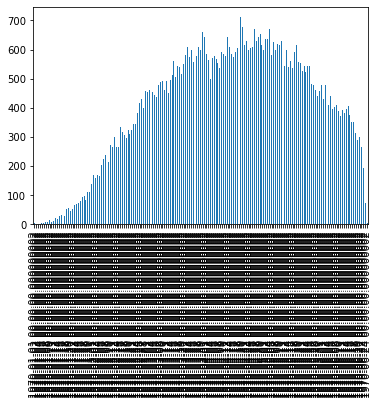

In [258]:
COVID19data_g=pd.DataFrame({'FECHADEF':COVID19data['FECHADEF'],'RESULTADO':COVID19data['RESULTADO']})
dg=COVID19data_g.loc[COVID19data_g.FECHADEF!='9999-99-99',:].loc[COVID19data_g.RESULTADO==1,:]
dg['FECHADEF'] = pd.to_datetime(dg['FECHADEF'],format='%d/%m/%Y')
freq=dg.groupby(['FECHADEF']).count()
freq2=pd.DataFrame(freq.values)
freq2.rename(columns={0:'ff'},inplace=True)
freq2
ts=pd.Series(freq2.ff,index=pd.date_range(freq2.ff.values[0],periods=len(freq2.ff)))
for j in range(len(ts.values)):
    ts[j]=freq2.ff.values[j]
ts.plot.bar()
plt.xticks(rotation='vertical')
#fecha=pd.DataFrame(freq.values)
#fecha

#plt.plot(dg['FECHADEF'], dg['RESULTADO'])
#p=dg.sum()